#  Approximating parameters of multivariate normal distribution (MVN)

Suppose we are given a set of high-dimension data sampled from a multivariate normal distribution like: $X \sim MVN(\theta, \Sigma).$ The goal is to derive the parameters (i.e., $\theta, \Sigma$).

There are multiple solutions to achieve this goal either from the persective of frequentist or bayesian. This blog will try to illustrate one of a bayesian solution, i.e., Maximum a posterior estimation (MAP). It can be also regared as my personal note learning bayesian solution for data mining. 
Welcome to correct me if there are any mistakes. I will appreciate any suggestions!
Now let's begin the dummy note! 





##  Preliminary

What we have now is the form of the target distribution, the MVN

$X \sim MVN(\theta, \Sigma)$

Given the d-dimension data $X \in \mathcal{R}^{d}$, we can have the likelihood:

$P(X \mid θ, Σ)=(2\pi)^{-d/2} \det(Σ)^{-1/2} \exp\{-\frac{1}{2}(X-\theta)^{T}Σ^{-1}(X-\theta) \}$

Since the posterior of the parameters is: posterior$ \propto$ likelihood * prior, we should specify the prior for $\theta, \Sigma$. The conjugate prioirs are adopted as follows:

$\theta \sim MVN(\mu,Ω)$

$Σ \sim \mathcal{W}^{-1} (\mathcal{v}_{0}, \Phi_{0}^{-1})$.

Where $\mathcal{W}^{-1}$ denotes inverse Wishart distribution (it is a routine prior distribution to place prior on the convariance matrix, just take it easy at this time). 


Let's begin the derivation based on the above definitions:

We first present the detailed expression of likelihood since it is related to the posterior of $θ$ and $Σ$. Suppose the size of data is $n$, then:

$P(X \mid θ,Σ)=(2\pi)^{\frac{1}{2}nd} \det(Σ)^{\frac{1}{2}}\exp\{\sum_{i=1}^{n}\frac{1}{2}(x_i-\theta)^{T}\Sigma^{-1}(x_i-\theta)\}$.$~~~~~~~~~~~~$ (1)

Or more clearly:

  $P(X \mid θ,Σ)= (2\pi)^{\frac{1}{2}dn} \det(Σ)^{\frac{n}{2}}\exp\{\frac{1}{2}[\sum_{i=1}^{n}x_{i}^{T}\Sigma^{-1}x-2\sum_{i=1}^{n}\theta^{T}\Sigma^{-1}x_{i}+\sum_{i=1}^{n}\theta^{T}\Sigma^{-1}θ]\}$. $~~~~~~~~~~~~$ (2)








##  Posterior of $θ$

 Simplify the prior as 
 
 $P(\theta) ∝ \exp\{-\frac{1}{2}(θ-\mu)^{T}\Omega^{-1}(θ-\mu)\}$
 
  $=\exp\{-\frac{1}{2}[\theta^{T}Ω^{-1}\theta - 2\theta^{T}Ω^{-1}\mu + \mu^{T}Ω^{-1}\mu] \}$.

  Since we are considering the posterior distribution for the $\theta$, any items that do not include $\theta$ can be removed. Therefore, we have

 $P(\theta) ∝ \exp\{-\frac{1}{2}[\theta^{T}Ω^{-1}\theta - 2\theta^{T}Ω^{-1}\mu]\}$. 

 Let $A_0=Ω^{-1}$ and $b_0 = Ω^{-1}\mu$. This is beneficial to simplify the derivation. So just follow it:)

 OK now we have a neat expression of prior of $\theta$:

 $P(\theta) ∝ \exp\{-\frac{1}{2}[\theta^{T}A_{0}\theta - 2\theta^{T}b_0]\}$. $~~~~~~~~~~~~$ (3)

  Now with the likelihood we can derive the posterior. Notably we can remove the item not related to $\theta$. Therefore Eq (1) can be simplifed as:

 $P(X \mid Σ,\theta)∝ \exp\{-\frac{1}{2}[-2\theta^{T}\Sigma^{-1}n\overline{x}+n\theta^{T}\Sigma^{-1}\theta]\}$

 $= \exp\{-\frac{1}{2}[\theta^{T}A_{1}θ-2\theta^{T}b_1]\}$, $~~~~~~~~~~~~$ (4)

 where $\overline{x}:=(\frac{1}{n}\sum_{i=1}^{n}x_{i1},...,\frac{1}{n}\sum_{i=1}^{n}x_{id})^{T}$; $A_1 = n\Sigma^{-1}; b_1 = \Sigma^{-1}n\overline{x}$

 Then we get:

 $P(\theta \mid X, Σ) ∝ P(\theta)P(X \mid \Sigma θ)$

 $=\exp\{-\frac{1}{2}[θ^{T}(A_0+A_1)\theta-2\theta_{T}(b_0+b_1)]\}$
 
  $=\exp\{-\frac{1}{2}[θ^{T}A_n\theta-2\theta_{T}b_n]\}$. $~~~~~~~~~~~~$ (5)

  Where $A_n=A_0+A_1=nΣ^{-1}+Ω^{-1},b_n=b_0+b_1=nΣ^{-1}+Ω^{-1}$.

  Since the prior is conjugate to the posterior, we can furhter derive:

  $P(θ\mid Σ,X) = MVN(A_{n}^{-1}b_n, A_{n}^{-1})$. $~~~~~~~~~~~~$ (6)

## Posterior of $Σ$

Now we begin to address the posterior of $Σ$. The basic procedure is similar: Just simplify likelihood, then multiply likelihood with prior, do some mathematical simplification and we will get it:

The prior of $\Sigma$ is more scary but just regard it as a tool, you don't need to figure out its origin in this blog:

$P(\Sigma)=\det(\Sigma)^{-(\mathcal{v}_0+d+1)/2}\exp\{-tr(\Phi_0Σ^{-1})/2\}$$~~~~~~~~~~~~$ (7)

Given this prior, the likelihood can not be simplified as what we did in $\theta$ since no item is free of $Σ$... But we should do some transformation to allow likelihood to bette match the prior. Eq(1) can be transformed as follows:

$P(X\mid θ,Σ) ∝ \det(\Sigma)^{-n/2}\exp\{\sum_{i=1}^{n}tr((x_i-\theta)(x_i-\theta)^TΣ^{-1})/2\}$

Note $tr$ indicates the trace of matrix. It is introduced becasue there is a formula like $UVU^T=tr(UVU^T)=tr(VU^TU)$, which can be used to simplified the calculation here.

Therefore, we have a neat expression of likelihood for $\Sigma$ this time:

$P(X\mid θ,Σ) ∝ \det(\Sigma)^{-n/2}\exp\{\sum_{i=1}^{n}tr(\Phi_{\theta}Σ^{-1})/2\}$.$~~~~~~~~~~~~$ (8)

Where $\Phi_{\theta}=\sum_{i=1}^{n}(x_i-\theta)(x_i-\theta)^T$.

Here we go! Combined Eq(7) and Eq(8), we have:



$P(\Sigma \mid X,\theta) ∝ P(\Sigma)P(X\mid θ,X)$

$∝ \det(\Sigma)^{-(\mathcal{v_0}+d+1)/2}\exp\{-tr(\Phi_0\Sigma^{-1})/2\} × \det(\Sigma)^{-n/2}\exp\{-tr(S_{\theta}\Sigma^{-1})/2\}$

$∝ \det(\Sigma)^{-(\mathcal{v_0}+n+d+1)/2}\exp\{-tr((\Phi_0+\Phi_{\theta})\Sigma^{-1})/2\}$.

Let $\Phi_n = (\Phi_0+\Phi_{\theta})^{-1}$ and again we exploit the conjugate property:

$P(Σ\mid X,\theta) = \mathcal{W}^{-1}(\mathcal{v_0}+n,\Phi_n^{-1})$.$~~~~~~~~~~~~$ (9)

## Summary

Eq(6) and Eq(9) are what we want in deriving the parameters. They present the posterior distribution for $\theta$ and $ Σ$. Given these two posterior distributions, we can conduct sampling for approximation. Gibbs sampling is one of the efficient sampling method. Below is the code of approximating paramaters for a MVN.

# Toy example in Python

In [48]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [69]:
# X ~ MVN(theta, Sigma)
ground_truth_mean = [11,22,33]
ground_truth_cov = np.array([[1,0,0], [0,2,0], [0,0,3]]) # If you choose different ground mean or cov, you may adjust the number of sample and the iteration for good approximation.
def ground_truth_data(n):
  return st.multivariate_normal(mean=ground_truth_mean, cov=ground_truth_cov).rvs(n)

# Sigma ~ invW(v, \Phi^(-1))
def sample_sigma(df, S):
  return st.invwishart(df=df, scale=S).rvs()

# Theta ~ MVN(mu, Omega)
def sample_theta(mu, omega):
  return st.multivariate_normal(mean=mu, cov=omega).rvs()

In [76]:
#Gibbs Sampling
itr = 6000
theta_prior_mu = np.zeros([3])
theta_prior_omega = np.eye(3)

v_0 = 0

n_samples = 600
X = ground_truth_data(n=n_samples)

mu_n = theta_prior_mu
omega_n = theta_prior_omega

theta_set = []
sigma_set = []
for i in range(itr):

  # Sample theta
  theta = sample_theta(mu=mu_n, omega=omega_n)

  # Update posterior of sigma given theta
  v_n = v_0 + n_samples

  Phi_theta = np.eye(3)
  for n in range(n_samples):
    Phi_theta += np.outer((X[n]-theta), (X[n]-theta))


  # Sample sigma
  sigma = sample_sigma(df=v_n, S=Phi_theta)
  # Update posterior of theta given sigma
  A_n = np.linalg.inv(theta_prior_omega) + n_samples * np.linalg.inv(sigma)
  b_n = np.linalg.inv(theta_prior_omega).dot(theta_prior_mu) + np.linalg.inv(sigma).dot(X.mean(axis=0)) * n_samples 

  mu_n = np.linalg.inv(A_n).dot(b_n)
  omega_n = np.linalg.inv(A_n)

  # record the result
  theta_set.append(theta)
  sigma_set.append(sigma)


Ground Truth:11 Estimated:10.94532356735331
Ground Truth:22 Estimated:21.926727549117214
Ground Truth:33 Estimated:32.870453034714146


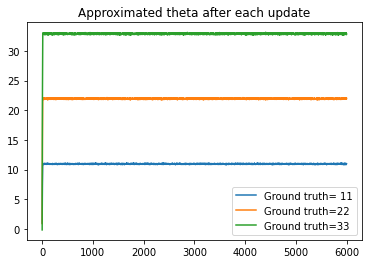

In [77]:
for i in range(3):
  print("Ground Truth:{} Estimated:{}".format(ground_truth_mean[i], np.array(theta_set)[10:,i].mean()))
plt.title("Approximated theta after each update")
plt.plot(np.array(theta_set)[:,0],label="Ground truth= "+str(ground_truth_mean[0]))
plt.plot(np.array(theta_set)[:,1],label="Ground truth="+str(ground_truth_mean[1]))
plt.plot(np.array(theta_set)[:,2],label="Ground truth="+str(ground_truth_mean[2]))
plt.legend()
plt.show()

In [78]:
for i in range(3):
  j=i
  while j<3:
    print("Ground Truth:{} Estimated:{}".format(ground_truth_cov[i,j], np.array(sigma_set)[1:,i,j].mean()))
    # plt.plot(np.array(sigma_set)[1:,i,j],label="entry_{}_{}".format(i,j))
    j+=1
# plt.legend()
# plt.show()

Ground Truth:1 Estimated:1.1556483081411382
Ground Truth:0 Estimated:0.023037175629537828
Ground Truth:0 Estimated:0.013238720911246274
Ground Truth:2 Estimated:2.0760194551477884
Ground Truth:0 Estimated:0.29068301396154655
Ground Truth:3 Estimated:3.169126047624364
